In [ ]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_dir = "D:\LP4\LP-IV-datasets\Object Detection(Ass6)\caltech-101-img"
dataset_datagen = ImageDataGenerator(rescale = 1.0/255)
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'categorical'
)

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the zip file in Google Drive
drive_zip_path = '/content/drive/MyDrive/imageds.zip'

# Specify the destination folder in Colab (e.g., /content/your_dataset/)
extracted_folder_path = '/content/dataset/'

# Extract the contents of the zip file
with zipfile.ZipFile(drive_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# List the contents of the extracted folder
print("Contents of the extracted folder:")
!ls $extracted_folder_path


Mounted at /content/drive
Contents of the extracted folder:
caltech-101-img


In [ ]:
dataset_dir = "/content/dataset/caltech-101-img"
dataset_datagen = ImageDataGenerator(rescale = 1.0/255)
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size = (64,64),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 9144 images belonging to 102 classes.


In [ ]:
dataset_generator

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [ ]:
weights_path = "/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights = weights_path, include_top = False, input_shape = (64,64,3))

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model1 = Sequential()
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(256, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(102, activation = 'softmax'))

In [ ]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]
model1.fit(x_train, y_train, epochs = 1, validation_data = (x_test, y_test))

63/63 [==============================] - 240s 4s/step - loss: 3.3134 - accuracy: 0.3180 - val_loss: 2.7989 - val_accuracy: 0.4125


In [ ]:
for layer in base_model.layers[-4:]:
  layer.trainable = True

In [ ]:
model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(256, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(102, activation = 'softmax'))

In [ ]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.fit(x_train, y_train, epochs = 1, validation_data = (x_test,y_test))

63/63 [==============================] - 232s 4s/step - loss: 3.9008 - accuracy: 0.1980 - val_loss: 3.4972 - val_accuracy: 0.2450


In [ ]:
import matplotlib.pyplot as plt
predicted1 = model1.predict(x_test)

63/63 [==============================] - 98s 2s/step


In [ ]:
predicted2 = model2.predict(x_test)

63/63 [==============================] - 139s 2s/step


Predicted 1 :  watch
Predicted 2 :  airplanes
Actual :  watch


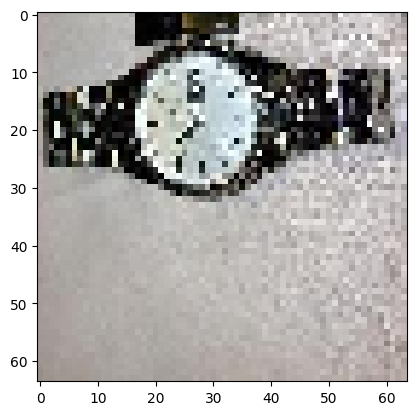

In [ ]:
labels = list(dataset_generator.class_indices.keys())
n = 887
plt.imshow(x_test[n])
print("Predicted 1 : ", labels[np.argmax(predicted1[n])])
print("Predicted 2 : ", labels[np.argmax(predicted2[n])])
print("Actual : ", labels[np.argmax(y_test[n])])
